## Engenharia de Sistemas de Software Inteligentes 
## Aluna: Ana Beatriz Tavares de Souza


In [135]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

## Carga do Dataset

In [136]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/BeatrizTavare-s/MVP2-backend/refs/heads/main/MachineLearning/data/dataset_obesidade.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,genero_masculino,idade,historico_familiar_sobrepeso,consumo_alta_caloria_com_frequencia,consumo_vegetais_com_frequencia,refeicoes_dia,consumo_alimentos_entre_refeicoes,fumante,consumo_agua,monitora_calorias_ingeridas,nivel_atividade_fisica,nivel_uso_tela,consumo_alcool,transporte_automovel,transporte_bicicleta,transporte_motocicleta,transporte_publico,transporte_caminhada,obeso
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [137]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:18]
y = array[:,18]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.867871 (0.018690)
CART: 0.880924 (0.032468)
NB: 0.745893 (0.028489)
SVM: 0.704952 (0.019072)
Bagging: 0.931269 (0.032359)
RF: 0.935996 (0.025864)
ET: 0.936003 (0.026746)
Ada: 0.831153 (0.028744)
GB: 0.880921 (0.024079)
Voting: 0.813983 (0.016963)


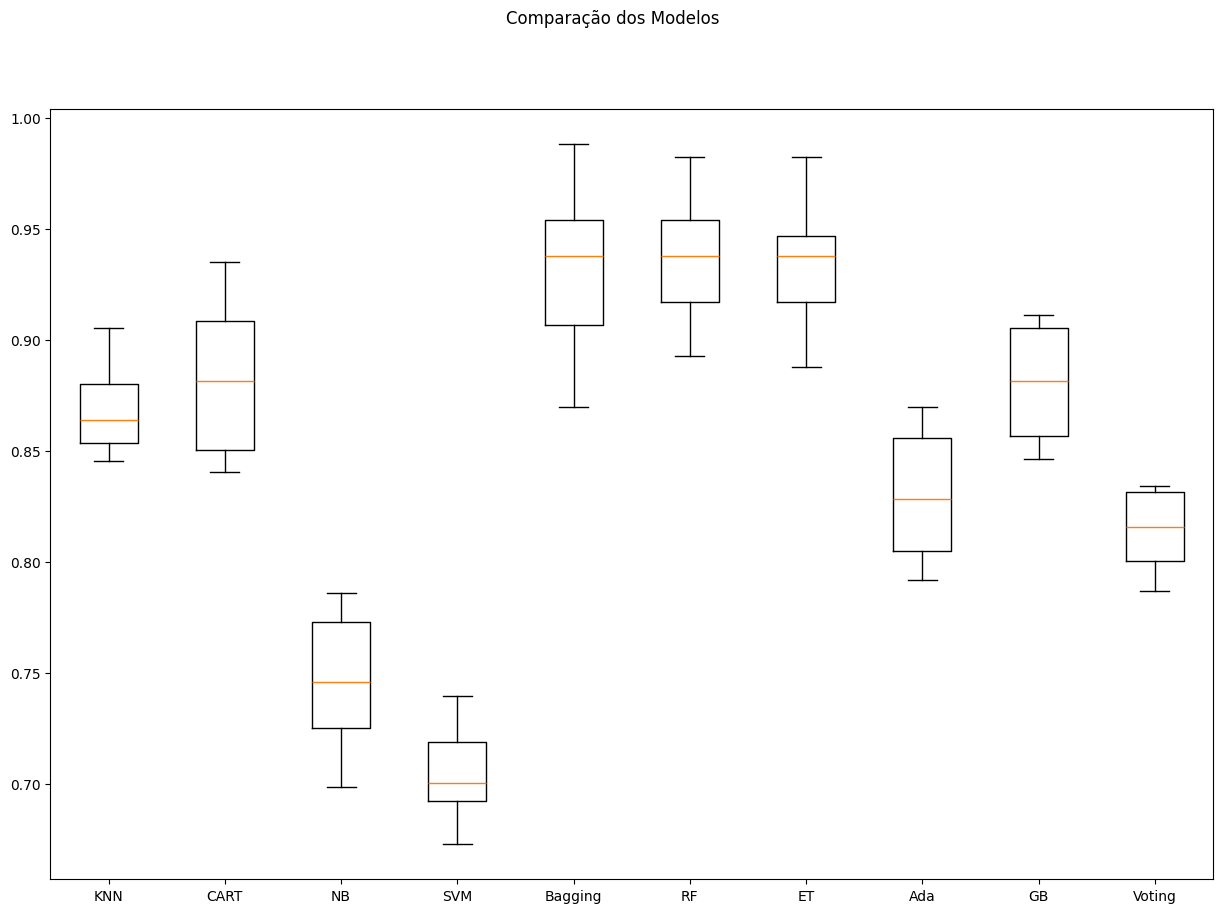

In [138]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))


# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.868 (0.019)
CART-orig: 0.881 (0.032)
NB-orig: 0.746 (0.028)
SVM-orig: 0.705 (0.019)
RF-orig: 0.940 (0.026)
ET-orig: 0.938 (0.028)
KNN-padr: 0.897 (0.036)
CART-padr: 0.879 (0.028)
NB-padr: 0.746 (0.028)
SVM-padr: 0.882 (0.029)
RF-padr: 0.941 (0.024)
ET-padr: 0.938 (0.025)
KNN-norm: 0.890 (0.034)
CART-norm: 0.886 (0.031)
NB-norm: 0.746 (0.028)
SVM-norm: 0.838 (0.035)
RF-norm: 0.936 (0.028)
ET-norm: 0.937 (0.024)


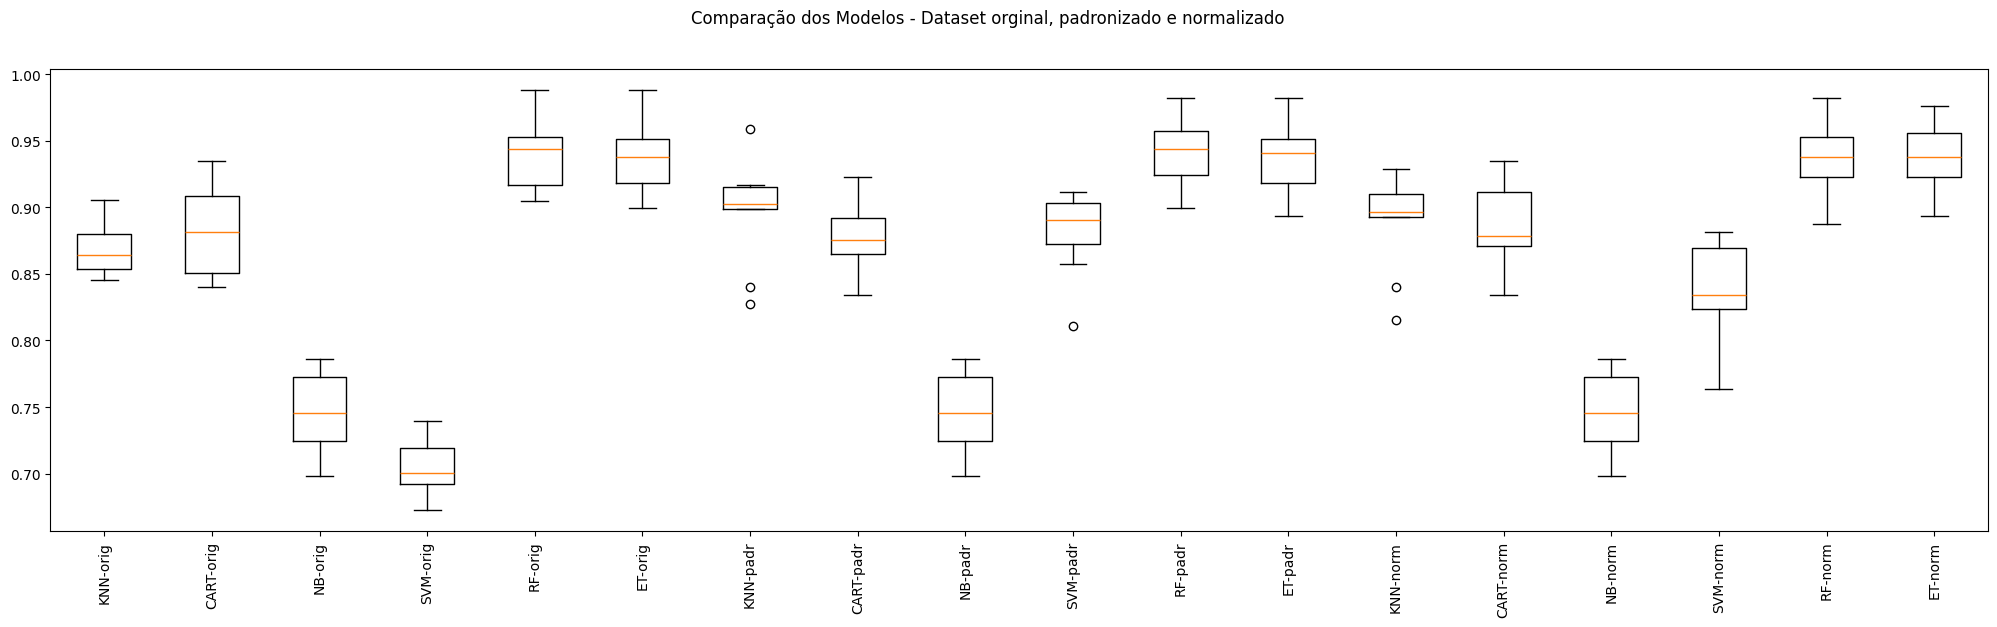

In [139]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extremely_random_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))


# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extremely_random_trees])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extremely_random_trees])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extremely_random_trees])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [140]:
# np.random.seed(7)  # Definindo uma semente global para este bloco

# # Lista de modelos
# models = []

# # Criando os modelos e adicionando-os na lista de modelos
# models.append(('LR', LogisticRegression(max_iter=200)))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))

# # Definindo os parâmetros do classificador base para o BaggingClassifier
# base = DecisionTreeClassifier()
# num_trees = 100
# max_features = 3

# # Criando os modelos para o VotingClassifier
# bases = []
# model1 = LogisticRegression(max_iter=200)
# bases.append(('logistic', model1))
# model2 = DecisionTreeClassifier()
# bases.append(('cart', model2))
# model3 = SVC()
# bases.append(('svm', model3))

# # Criando os ensembles e adicionando-os na lista de modelos
# models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
# models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
# models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
# models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
# models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
# models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# # Definindo os componentes do pipeline
# standard_scaler = ('StandardScaler', StandardScaler())
# min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# # Lista de pipelines
# pipelines = []

# # Criando pipelines para cada modelo
# for name, model in models:
#     pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
#     pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
#     pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# # Definindo os parâmetros para GridSearchCV
# param_grids = {
#     'LR': {
#         'LR__C': [0.01, 0.1, 1, 10, 100],
#         'LR__solver': ['liblinear', 'saga']
#     },
#     'KNN': {
#         'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
#         'KNN__metric': ["euclidean", "manhattan", "minkowski"]
#     },
#     'CART': {
#         'CART__max_depth': [None, 10, 20, 30, 40, 50],
#         'CART__min_samples_split': [2, 5, 10],
#         'CART__min_samples_leaf': [1, 2, 4]
#     },
#     'NB': {
#         'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
#     },
#     'SVM': {
#         'SVM__C': [0.1, 1, 10, 100],
#         'SVM__gamma': [1, 0.1, 0.01, 0.001],
#         'SVM__kernel': ['rbf', 'linear']
#     },
#     'RF': {
#         'RF__n_estimators': [10, 50, 100, 200],
#         'RF__max_features': ['auto', 'sqrt', 'log2'],
#         'RF__max_depth': [None, 10, 20, 30],
#         'RF__min_samples_split': [2, 5, 10],
#         'RF__min_samples_leaf': [1, 2, 4]
#     },
#     'ET': {
#         'ET__n_estimators': [10, 50, 100, 200],
#         'ET__max_features': ['auto', 'sqrt', 'log2'],
#         'ET__max_depth': [None, 10, 20, 30],
#         'ET__min_samples_split': [2, 5, 10],
#         'ET__min_samples_leaf': [1, 2, 4]
#     },
#     'Ada': {
#         'Ada__n_estimators': [10, 50, 100, 200],
#         'Ada__learning_rate': [0.01, 0.1, 1, 10]
#     },
#     'GB': {
#         'GB__n_estimators': [10, 50, 100, 200],
#         'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
#         'GB__max_depth': [3, 5, 7, 9]
#     },
#     'Voting': {
#         # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
#         # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
#     }
# }

# # Parâmetros de cross-validation e scoring
# scoring = 'accuracy'
# kfold = 5

# # Executando o GridSearchCV para cada pipeline
# for name, pipeline in pipelines:
#     model_type = name.split('-')[0]
#     if model_type in param_grids:
#         param_grid = param_grids[model_type]
#     else:
#         param_grid = {}  # Para modelos que não têm parâmetros definidos

#     grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
#     grid.fit(X_train, y_train)
#     # Imprimindo a melhor configuração
#     print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

# It took 53min

In [141]:
# Modelo: LR-orig - Melhor: 0.760072 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
# Modelo: LR-padr - Melhor: 0.757700 usando {'LR__C': 1, 'LR__solver': 'saga'}
# Modelo: LR-norm - Melhor: 0.758294 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
# Modelo: KNN-orig - Melhor: 0.903443 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
# Modelo: KNN-padr - Melhor: 0.914106 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
# Modelo: KNN-norm - Melhor: 0.902251 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
# Modelo: CART-orig - Melhor: 0.869671 usando {'CART__max_depth': 40, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
# Modelo: CART-padr - Melhor: 0.871452 usando {'CART__max_depth': 50, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 5}
# Modelo: CART-norm - Melhor: 0.870265 usando {'CART__max_depth': 20, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 2}
# Modelo: NB-orig - Melhor: 0.738753 usando {'NB__var_smoothing': 1e-05}
# Modelo: NB-padr - Melhor: 0.734607 usando {'NB__var_smoothing': 1e-07}
# Modelo: NB-norm - Melhor: 0.734016 usando {'NB__var_smoothing': 1e-08}
# Modelo: SVM-orig - Melhor: 0.919441 usando {'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
# Modelo: SVM-padr - Melhor: 0.915890 usando {'SVM__C': 100, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
# Modelo: SVM-norm - Melhor: 0.908182 usando {'SVM__C': 100, 'SVM__gamma': 1, 'SVM__kernel': 'rbf'}
# Modelo: Bagging-orig - Melhor: 0.925358 usando {}
# Modelo: Bagging-padr - Melhor: 0.923579 usando {}
# Modelo: Bagging-norm - Melhor: 0.924764 usando {}
# Modelo: RF-orig - Melhor: 0.936620 usando {'RF__max_depth': 20, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}
# Modelo: RF-padr - Melhor: 0.938985 usando {'RF__max_depth': None, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}
# Modelo: RF-norm - Melhor: 0.936620 usando {'RF__max_depth': 20, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 200}
# Modelo: ET-orig - Melhor: 0.933069 usando {'ET__max_depth': None, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 100}
# Modelo: ET-padr - Melhor: 0.933068 usando {'ET__max_depth': 20, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 100}
# Modelo: ET-norm - Melhor: 0.932478 usando {'ET__max_depth': 20, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 50}
# Modelo: Ada-orig - Melhor: 0.822285 usando {'Ada__learning_rate': 1, 'Ada__n_estimators': 200}
# ...
# Modelo: GB-norm - Melhor: 0.934832 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 9, 'GB__n_estimators': 200}
# Modelo: Voting-orig - Melhor: 0.812201 usando {}
# Modelo: Voting-padr - Melhor: 0.870867 usando {}
# Modelo: Voting-norm - Melhor: 0.838274 usando {}

In [142]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.913500 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-padr - Melhor: 0.919432 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-norm - Melhor: 0.914092 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}


## Finalização do Modelo

In [143]:
# Avaliação do modelo com o conjunto de testes 

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.91725768321513



Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       228
         1.0       0.88      0.94      0.91       195

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.92      0.92      0.92       423


Matriz de Confusão:
[[204  24]
 [ 11 184]]


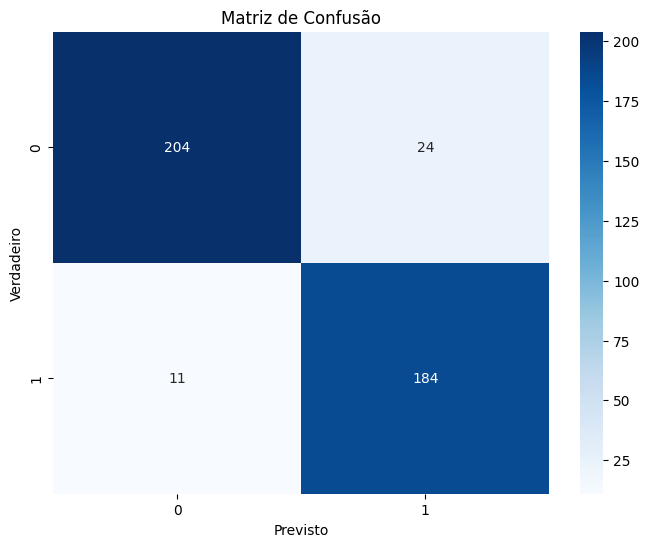

In [144]:
# # Relatório de classificação

print("\nRelatório de Classificação:")
print(classification_report(y_test, predictions))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, predictions)
print("\nMatriz de Confusão:")
print(conf_matrix)

# Plot da matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()


In [145]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [146]:
# # Criação do pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('Knn', model) 
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

print(accuracy_score(y_test, predictions))

0.91725768321513


## Salvando arquivos

In [147]:

# Salvando o modelo
model_filename = 'modelo_obesidade.pkl'
with open("../models/"+model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
scaler_filename = 'standard_scaler_obesidade.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Salvando o pipeline
pipeline_filename = 'rf_obesidade_pipeline.pkl'
with open(pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("../data/X_test_dataset_obesidade.csv", index=False)
y_test_df.to_csv("../data/y_test_dataset_obesidade.csv", index=False)

## Simulando a aplicação do modelo em dados não vistos

In [148]:
# Novos dados - não sabemos a classe!
data_nao_obeso = {
    'genero_masculino': [0],  # Mulher
    'idade': [25],  # Idade 25 anos
    'historico_familiar_sobrepeso': [0],  # Sem histórico familiar de obesidade
    'consumo_alta_caloria_com_frequencia': [0],  # Não consome alta caloria com frequência
    'consumo_vegetais_com_frequencia': [1],  # Alto consumo de vegetais
    'refeicoes_dia': [3],  # Três refeições por dia
    'consumo_alimentos_entre_refeicoes': [0],  # Não consome alimentos entre refeições
    'fumante': [0],  # Não fumante
    'consumo_agua': [2],  # Consumo moderado de água
    'monitora_calorias_ingeridas': [1],  # Monitora calorias ingeridas
    'nivel_atividade_fisica': [3],  # Alto nível de atividade física
    'nivel_uso_tela': [1],  # Uso moderado de telas
    'consumo_alcool': [0],  # Não consome álcool
    'transporte_automovel': [0],  # Não usa carro como principal transporte
    'transporte_bicicleta': [1],  # Usa bicicleta
    'transporte_motocicleta': [0],  # Não usa motocicleta
    'transporte_publico': [1],  # Usa transporte público
    'transporte_caminhada': [1],  # Caminha como meio de transporte
}

data_obeso = {
    'genero_masculino': [1],  # Homem
    'idade': [40],  # Idade 40 anos
    'historico_familiar_sobrepeso': [1],  # Com histórico familiar de obesidade
    'consumo_alta_caloria_com_frequencia': [1],  # Consome alta caloria com frequência
    'consumo_vegetais_com_frequencia': [0],  # Pouco consumo de vegetais
    'refeicoes_dia': [1],  # Menos de 3 refeições por dia
    'consumo_alimentos_entre_refeicoes': [4],  # Consome alimentos entre refeições
    'fumante': [1],  # Fumante
    'consumo_agua': [0],  # Baixo consumo de água
    'monitora_calorias_ingeridas': [0],  # Não monitora calorias ingeridas
    'nivel_atividade_fisica': [1],  # Baixo nível de atividade física
    'nivel_uso_tela': [2],  # Alto nível de uso de telas
    'consumo_alcool': [1],  # Consome álcool frequentemente
    'transporte_automovel': [1],  # Usa carro como principal transporte
    'transporte_bicicleta': [0],  # Não usa bicicleta
    'transporte_motocicleta': [0],  # Não usa motocicleta
    'transporte_publico': [0],  # Não usa transporte público
    'transporte_caminhada': [0],  # Não caminha como meio de transporte
}

atributos = [
    'genero_masculino', 'idade', 'historico_familiar_sobrepeso',
    'consumo_alta_caloria_com_frequencia', 'consumo_vegetais_com_frequencia',
    'refeicoes_dia', 'consumo_alimentos_entre_refeicoes', 'fumante',
    'consumo_agua', 'monitora_calorias_ingeridas', 'nivel_atividade_fisica',
    'nivel_uso_tela', 'consumo_alcool', 'transporte_automovel',
    'transporte_bicicleta', 'transporte_motocicleta', 'transporte_publico',
    'transporte_caminhada'
]

entrada = pd.DataFrame(data_obeso, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:18].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 0.98822657  2.47261196  0.47229133  0.36234913 -4.53173961 -2.16702273
   6.10399261  6.85399684 -3.27673688 -0.21827203 -0.01210937  2.20461814
   0.52115952  1.90243423 -0.05768012 -0.07237469 -1.72496895 -0.16507758]]


In [149]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1.]


# Análise de resultados do modelo
Na análise do modelo, optei por utilizar o KNN devido à sua simplicidade e eficácia em problemas de classificação. Apesar de outros modelos, como o Extra Trees Classifier, apresentarem resultados competitivos, o KNN demonstrou um desempenho superior na minha base de dados. Com uma acurácia de 0.9291, o KNN apresentou um relatório de classificação que mostra uma precisão de 0.91 e um recall de 0.96 para a classe 0.0, e uma precisão de 0.95 com recall de 0.89 para a classe 1.0. KNN teve uma matriz de confusão de [[219, 9], [21, 174]], reforçando a escolha deste último como a melhor opção para o meu problema específico.